<a href="https://colab.research.google.com/github/Ron-Wu/Machine-learning-0602/blob/main/cifar10_trydo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
# Cifar10: https://www.cs.toronto.edu/~kriz/cifar.html
names = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

deer


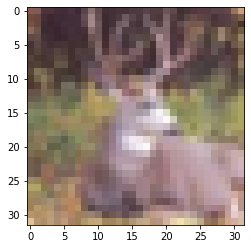

In [6]:
# mnist: (60000, ) [5, 2, 1, 0]
import matplotlib.pyplot as plt
import random

# 從train.shape知道總共有50000筆資料，所以隨機整數範圍是(0~49999)
idx = random.randint(0, 49999)

# 因為y_train 會印出list包list，為了取道最裡面 list 的單一值所以加上[0]
ans = y_train[idx][0]

# 可以印出對應的字串答案
print(names[ans])

# 可以show出對應訓練的圖片
plt.imshow(x_train[idx])